In [34]:
import requests
import pandas as pd
from time import sleep
from tqdm import tqdm
from SPARQLWrapper import SPARQLWrapper, JSON

Artwork data visualisation. 

Dates
1736    16
1862    10
1723     4
1834    14
1634     4
        ..
1606     6
1583     1
1483     1
1896     1
1547     1
Name: Number Of Artists, Length: 406, dtype: int64


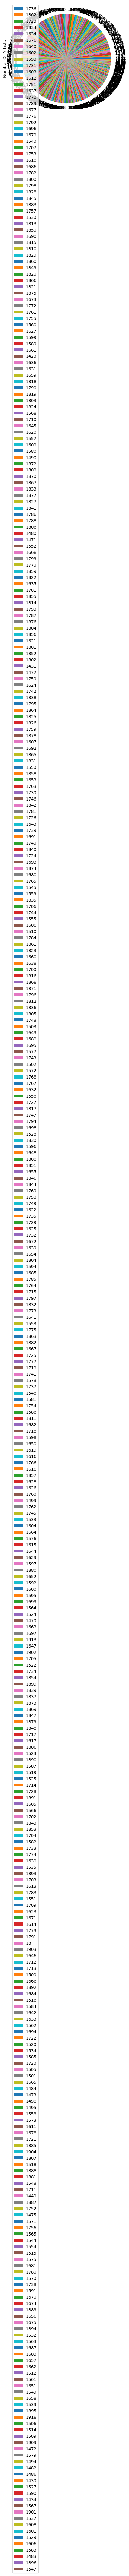

In [35]:
query = """ prefix art: <http://www.semanticweb.org/ontologies/2022/9/group_99#> 
prefix owl: <http://www.w3.org/2002/07/owl#> 
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> 
prefix xml: <http://www.w3.org/XML/1998/namespace> 
prefix xsd: <http://www.w3.org/2001/XMLSchema#> 
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> 
select  ?date WHERE { 
?artist rdf:type art:Artist .
?artist art:bornAt ?date

}"""

sparql = SPARQLWrapper("http://localhost:7200/repositories/group_99")


dict = {}
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    try:
        dict[result['date']['value']] += 1
    except:
        dict[result['date']['value']] = 1

s = pd.Series(dict, name='Number Of Artists')
s.index.name = 'Dates'

s.reset_index()

print(s)

df = pd.DataFrame(s)


ax = df.plot.pie(subplots = True)